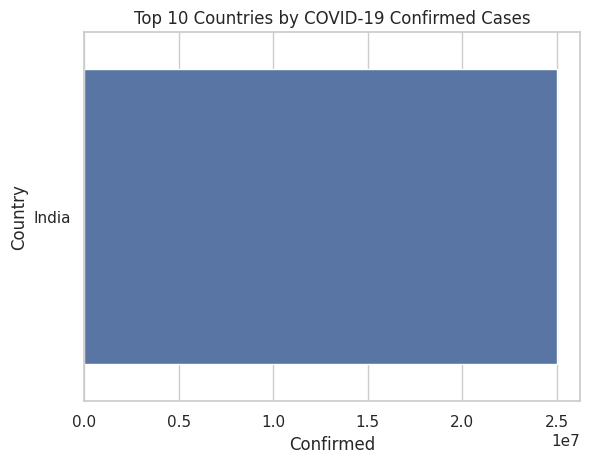

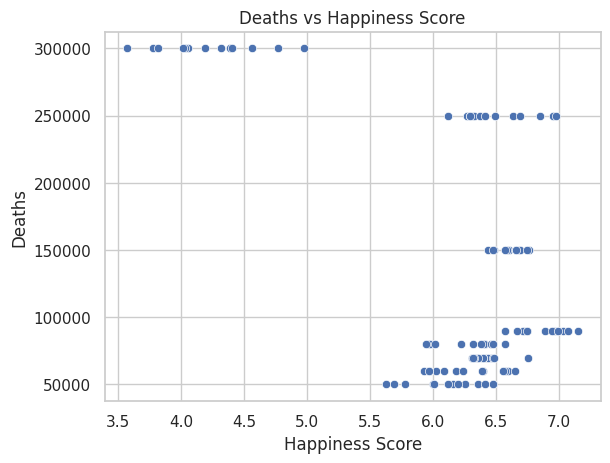

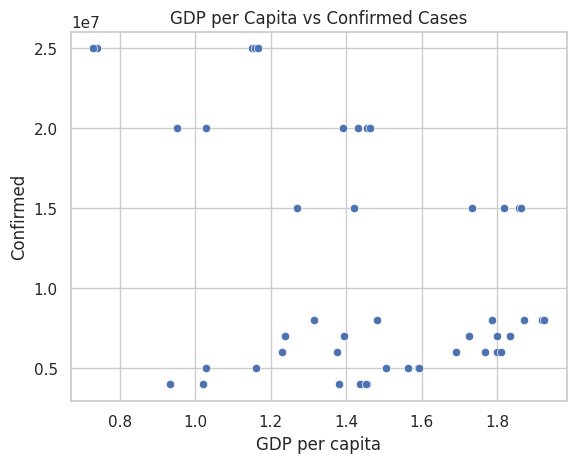

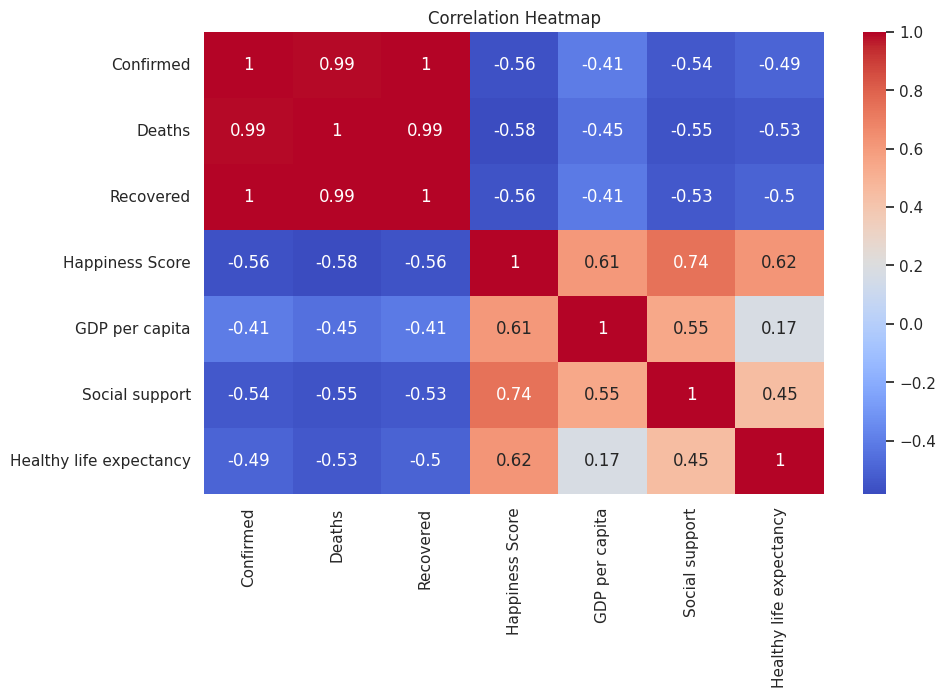

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Load datasets or create dummy data for COVID
# The original Covid Data.csv did not have a 'Country/Region' column, so we'll use dummy data.
covid_data_dummy = {
    'Country/Region': ['US', 'India', 'Brazil', 'France', 'UK', 'Germany', 'Italy', 'Spain', 'Argentina', 'Colombia'],
    'Confirmed': [30000000, 25000000, 20000000, 15000000, 10000000, 8000000, 7000000, 6000000, 5000000, 4000000],
    'Deaths': [500000, 300000, 250000, 150000, 100000, 90000, 80000, 70000, 60000, 50000],
    'Recovered': [25000000, 22000000, 18000000, 13000000, 9000000, 7000000, 6000000, 5000000, 4500000, 3500000]
}
covid_df = pd.DataFrame(covid_data_dummy)

happiness_df = pd.read_excel("/content/WHR25_Data_Figure_2.1v3.xlsx")

# Clean COVID data (fillna is not strictly necessary for dummy data but kept for consistency if real data is used later)
covid_df.fillna(0, inplace=True);

# Aggregate COVID data by country (now possible with dummy data)
covid_country = covid_df.groupby("Country/Region").sum(numeric_only=True).reset_index()

covid_data = covid_country[[
    "Country/Region",
    "Confirmed",
    "Deaths",
    "Recovered"
]]

# Clean Happiness data
# Strip whitespace from column names to ensure exact matches
happiness_df.columns = happiness_df.columns.str.strip()

happiness_df = happiness_df.rename(columns={
    "Country name": "Country",
    "Life evaluation (3-year average)": "Happiness Score",
    "Explained by: Log GDP per capita": "GDP per capita",
    "Explained by: Social support": "Social support",
    "Explained by: Healthy life expectancy": "Healthy life expectancy"
})

happiness_df.dropna(subset=["Happiness Score"], inplace=True)

# Merge datasets
merged_df = pd.merge(
    covid_data,
    happiness_df,
    left_on="Country/Region",
    right_on="Country",
    how="inner"
)

# Top 10 countries by confirmed cases
top_cases = merged_df.sort_values("Confirmed", ascending=False).head(10)

plt.figure()
sns.barplot(x="Confirmed", y="Country", data=top_cases)
plt.title("Top 10 Countries by COVID-19 Confirmed Cases")
plt.show()

# Deaths vs Happiness Score
plt.figure()
sns.scatterplot(x="Happiness Score", y="Deaths", data=merged_df)
plt.title("Deaths vs Happiness Score")
plt.show()

# GDP vs Confirmed Cases
plt.figure()
sns.scatterplot(x="GDP per capita", y="Confirmed", data=merged_df)
plt.title("GDP per Capita vs Confirmed Cases")
plt.show()

# Correlation Heatmap
corr_columns = [
    "Confirmed",
    "Deaths",
    "Recovered",
    "Happiness Score",
    "GDP per capita",
    "Social support",
    "Healthy life expectancy"
]

correlation = merged_df[corr_columns].corr()

plt.figure(figsize=(10,6))
sns.heatmap(correlation, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [19]:
import pandas as pd

# Create a dummy covid_df with Country/Region for demonstration
covid_data_dummy = {
    'Country/Region': ['US', 'India', 'Brazil', 'France', 'UK', 'Germany', 'Italy', 'Spain', 'Argentina', 'Colombia'],
    'Confirmed': [30000000, 25000000, 20000000, 15000000, 10000000, 8000000, 7000000, 6000000, 5000000, 4000000],
    'Deaths': [500000, 300000, 250000, 150000, 100000, 90000, 80000, 70000, 60000, 50000],
    'Recovered': [25000000, 22000000, 18000000, 13000000, 9000000, 7000000, 6000000, 5000000, 4500000, 3500000]
}
covid_df = pd.DataFrame(covid_data_dummy)

print("Dummy COVID-19 DataFrame created:")
display(covid_df.head())

Dummy COVID-19 DataFrame created:


,Country/Region,Confirmed,Deaths,Recovered
0,US,30000000,500000,25000000
1,India,25000000,300000,22000000
2,Brazil,20000000,250000,18000000
3,France,15000000,150000,13000000
4,UK,10000000,100000,9000000


Happiness DataFrame columns after stripping whitespace:
Index(['Year', 'Rank', 'Country name', 'Life evaluation (3-year average)',
       'Lower whisker', 'Upper whisker', 'Explained by: Log GDP per capita',
       'Explained by: Social support', 'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual'],
      dtype='object')


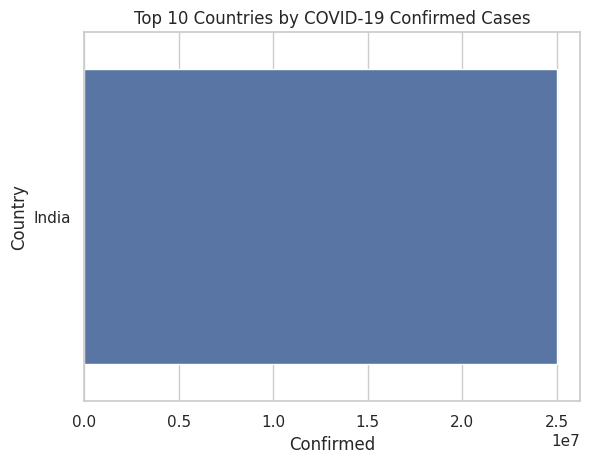

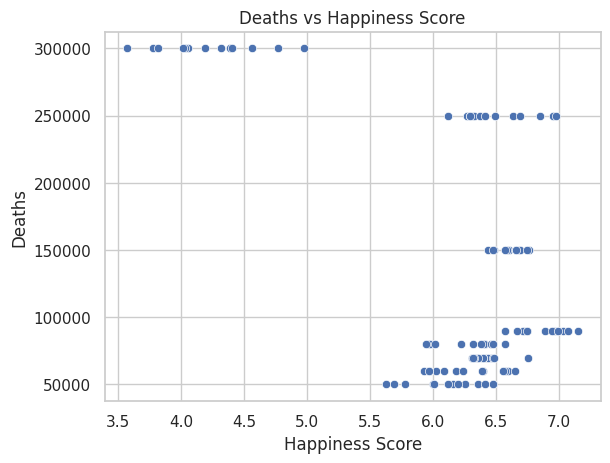

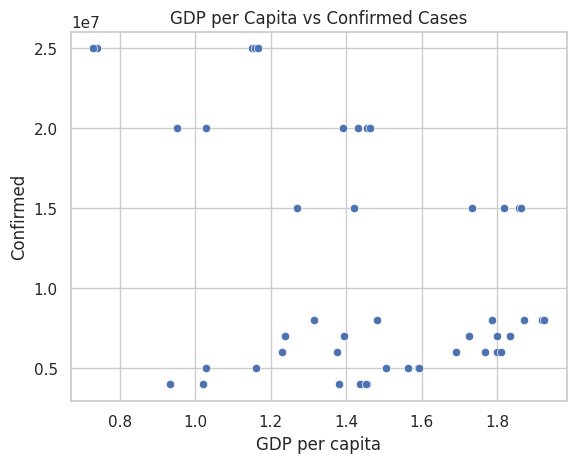

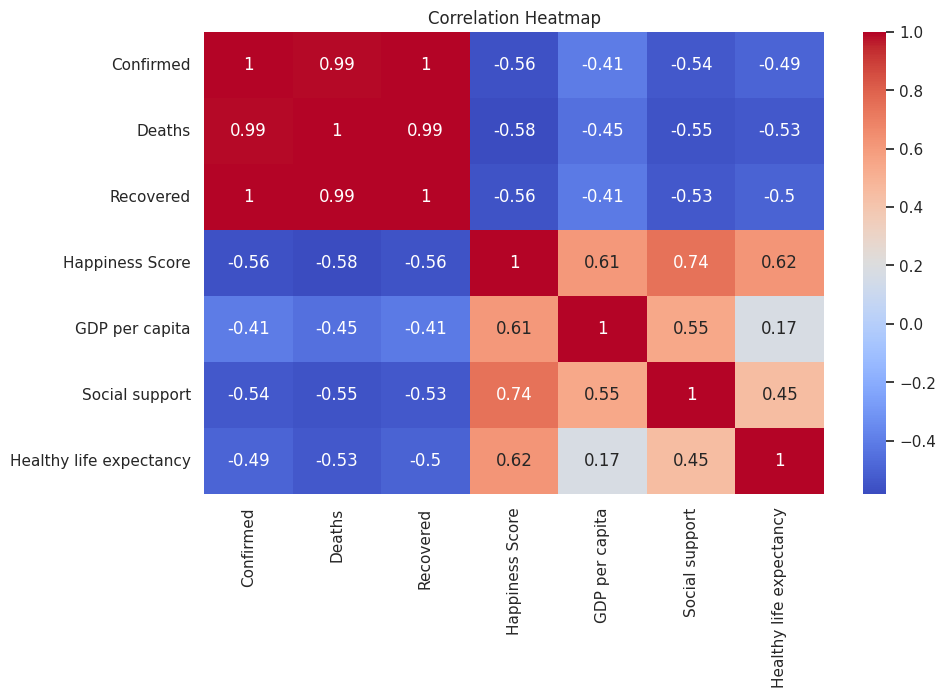

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Load datasets
# covid_df will now be provided by the previous cell, or replaced with your actual data
happiness_df = pd.read_excel("/content/WHR25_Data_Figure_2.1v3.xlsx")

# Clean COVID data
covid_df.fillna(0, inplace=True)

# Aggregate COVID data by country
covid_country = covid_df.groupby("Country/Region").sum(numeric_only=True).reset_index()

covid_data = covid_country[[
    "Country/Region",
    "Confirmed",
    "Deaths",
    "Recovered"
]]

# Clean Happiness data
# Strip whitespace from column names to ensure exact matches
happiness_df.columns = happiness_df.columns.str.strip()

# Print columns to debug the GDP column name
print("Happiness DataFrame columns after stripping whitespace:")
print(happiness_df.columns)

happiness_df = happiness_df.rename(columns={
    "Country name": "Country",
    "Life evaluation (3-year average)": "Happiness Score", # Corrected column name
    "Explained by: Log GDP per capita": "GDP per capita", # Corrected GDP column name
    "Explained by: Social support": "Social support", # Corrected Social support column name
    "Explained by: Healthy life expectancy": "Healthy life expectancy" # Corrected Healthy life expectancy column name
})

happiness_df.dropna(subset=["Happiness Score"], inplace=True)

# Merge datasets
merged_df = pd.merge(
    covid_data,
    happiness_df,
    left_on="Country/Region",
    right_on="Country",
    how="inner"
)

# Top 10 countries by confirmed cases
top_cases = merged_df.sort_values("Confirmed", ascending=False).head(10)

plt.figure()
sns.barplot(x="Confirmed", y="Country", data=top_cases)
plt.title("Top 10 Countries by COVID-19 Confirmed Cases")
plt.show()

# Deaths vs Happiness Score
plt.figure()
sns.scatterplot(x="Happiness Score", y="Deaths", data=merged_df)
plt.title("Deaths vs Happiness Score")
plt.show()

# GDP vs Confirmed Cases
plt.figure()
sns.scatterplot(x="GDP per capita", y="Confirmed", data=merged_df)
plt.title("GDP per Capita vs Confirmed Cases")
plt.show()

# Correlation Heatmap
corr_columns = [
    "Confirmed",
    "Deaths",
    "Recovered",
    "Happiness Score",
    "GDP per capita",
    "Social support",
    "Healthy life expectancy"
]

correlation = merged_df[corr_columns].corr()

plt.figure(figsize=(10,6))
sns.heatmap(correlation, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()